Importing The Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns',None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Read The Dataset

In [2]:
data = pd.read_csv('startup data.csv')

In [3]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


Exploratory Data Analysis

In [4]:
data['state']='other'
data.loc[(data['state_code']=='CA'),'state']='CA'
data.loc[(data['state_code']=='NY'),'state']='NY'
data.loc[(data['state_code']=='MA'),'state']='MA'
data.loc[(data['state_code']=='TX'),'state']='TX'
data.loc[(data['state_code']=='WA'),'state']='WA'

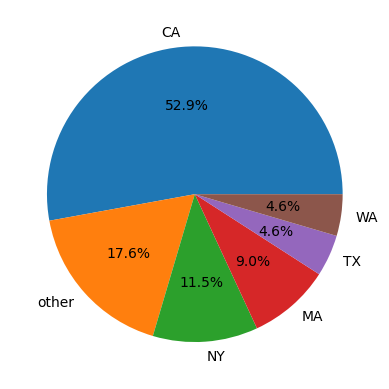

In [5]:
state_count=data['state'].value_counts()
plt.pie(state_count,labels= state_count.index,autopct='%1.1f%%')
plt.show()

In [6]:
data['category']='other'
data.loc[(data['category_code']=='software'),'category']='software'
data.loc[(data['category_code']=='web'),'category']='web'
data.loc[(data['category_code']=='mobile'),'category']='mobile'
data.loc[(data['category_code']=='enterprise'),'category']='enterprise'
data.loc[(data['category_code']=='advertising'),'category']='advertising'
data.loc[(data['category_code']=='games_video'),'category']='games_video'
data.loc[(data['category_code']=='semiconductor'),'category']='semiconductor'
data.loc[(data['category_code']=='network_hosting'),'category']='network_hosting'
data.loc[(data['category_code']=='biotech'),'category']='biotech'
data.loc[(data['category_code']=='hardware'),'category']='hardware'

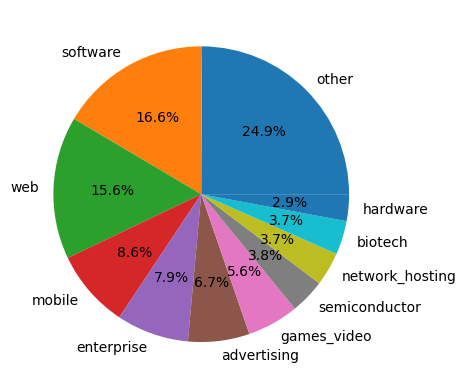

In [7]:
category_count=data['category'].value_counts()
plt.pie(category_count,labels= category_count.index,autopct='%1.1f%%')
plt.show()

Distribution of Status of Startup

In [8]:
prop_df=data.groupby('status').size().reset_index(name='counts')
prop_df['proportions']=prop_df['counts']/prop_df['counts'].sum()


Text(0.5, 1.0, 'Distribution of status of the startup')

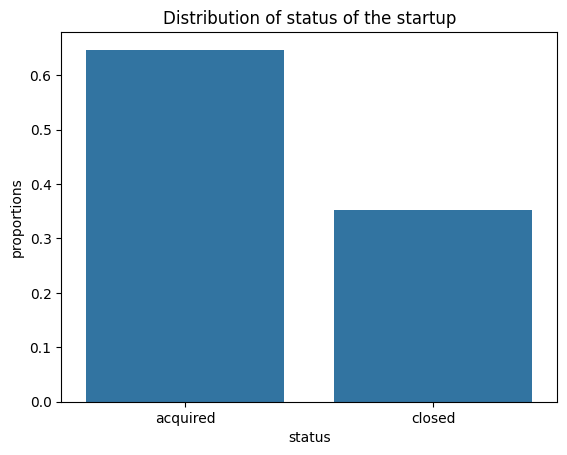

In [9]:
sns.barplot(data=prop_df,x='status',y='proportions')
plt.title('Distribution of status of the startup')

State Vs Status

Text(0.5, 1.0, 'State Vs Status')

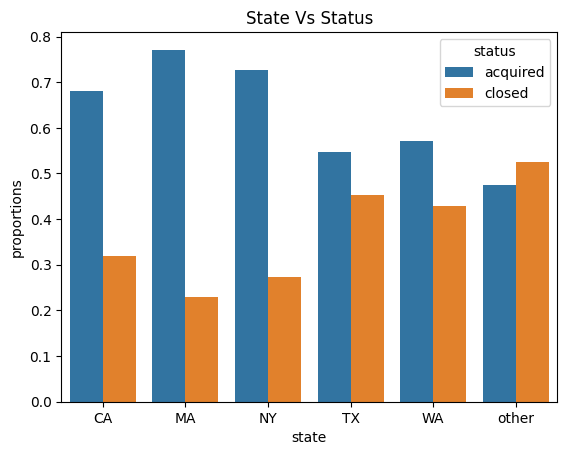

In [10]:
prop_df = data.groupby(['state', 'status'], group_keys=True).size().reset_index(name='count')
prop_df['proportions'] = prop_df['count'] / prop_df.groupby('state')['count'].transform('sum')
sns.barplot(data=prop_df, x='state', y='proportions', hue='status')
plt.title('State Vs Status')

State VS Category

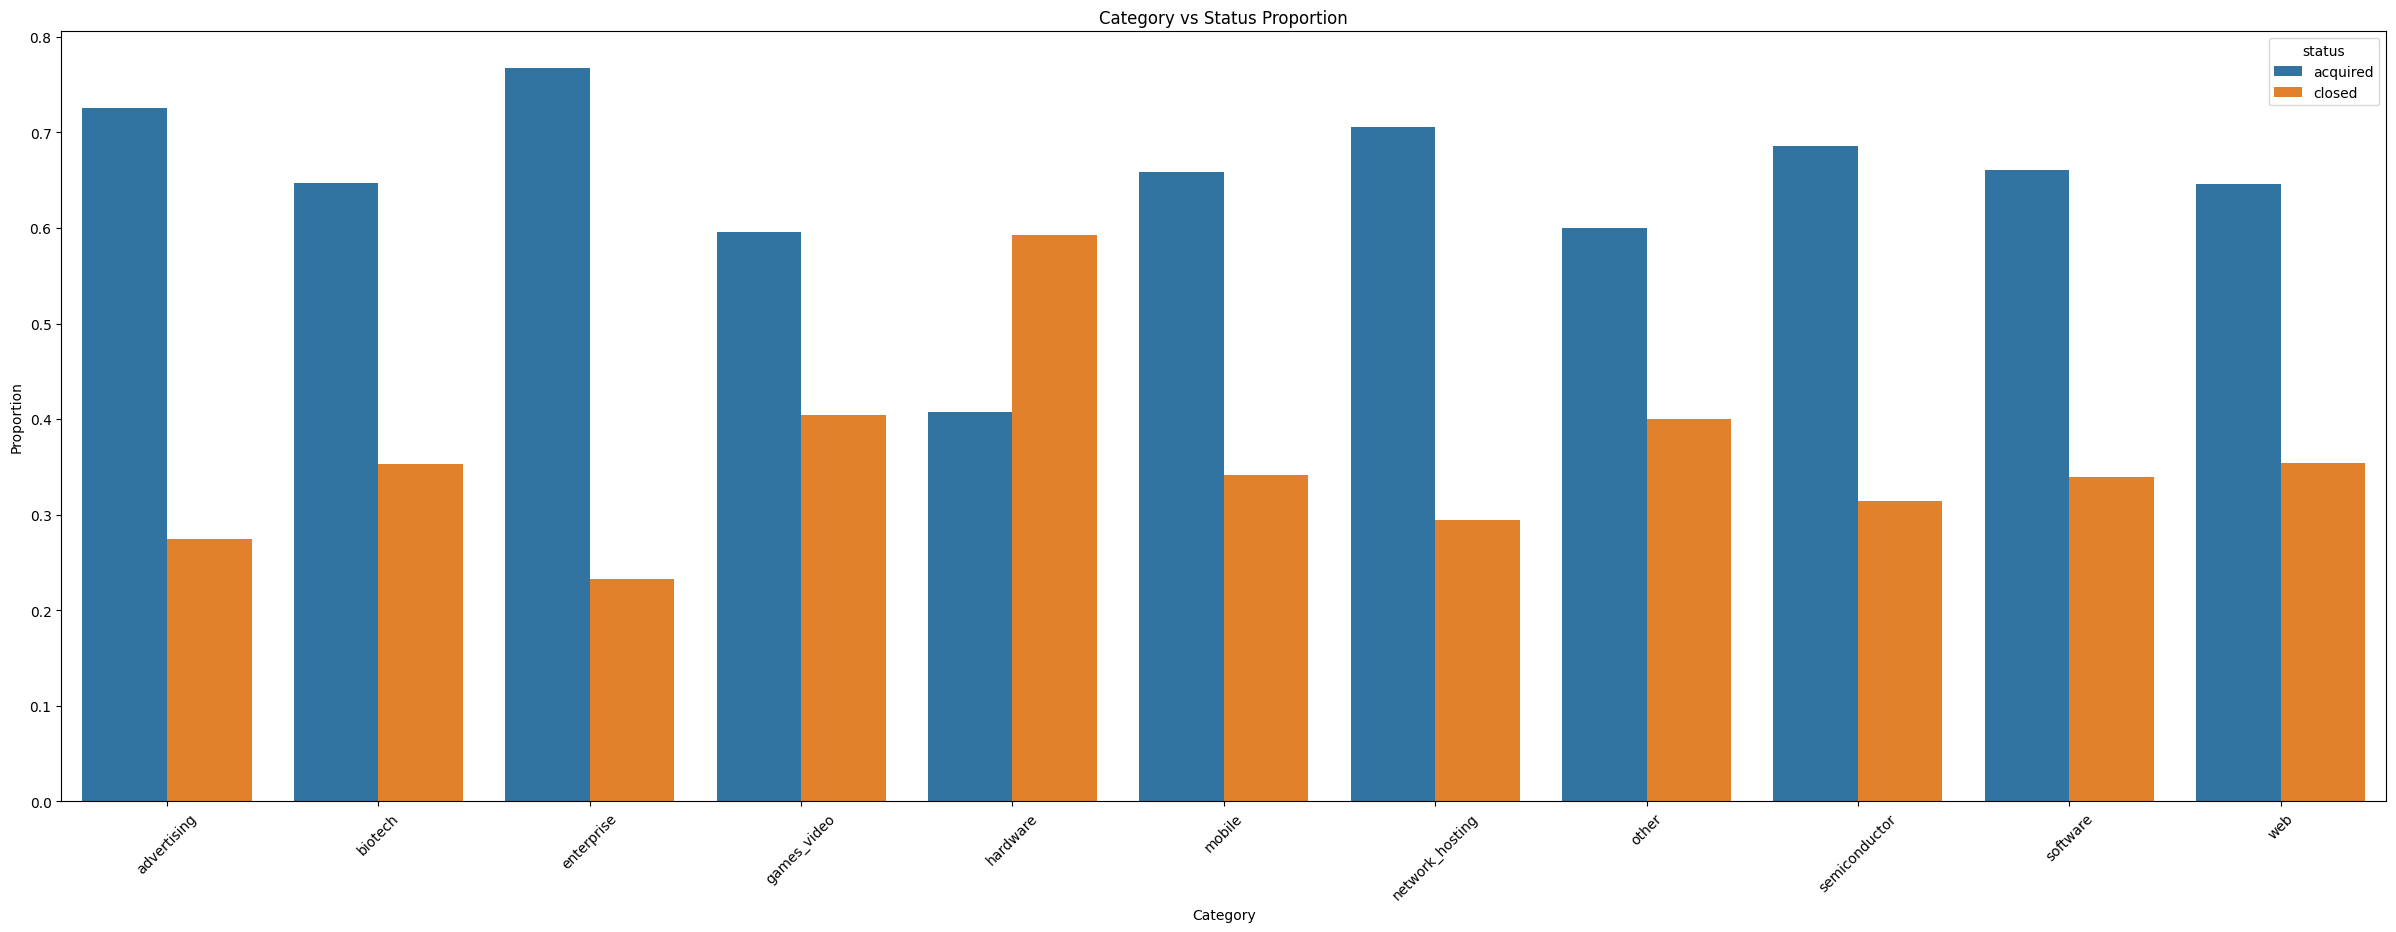

In [11]:
fig, ax = plt.subplots(figsize=(30, 10))
prop_df = data.groupby(['category', 'status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df['counts'] / prop_df.groupby('category')['counts'].transform('sum')
sns.barplot(data=prop_df, x='category', y='proportions', hue='status', ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Category vs Status Proportion')
ax.tick_params(axis='x', rotation=45)
plt.show()

Category VS Founded-Year

In [12]:
cat_year = pd.crosstab(index = data['founded_at'], columns = data['category'])


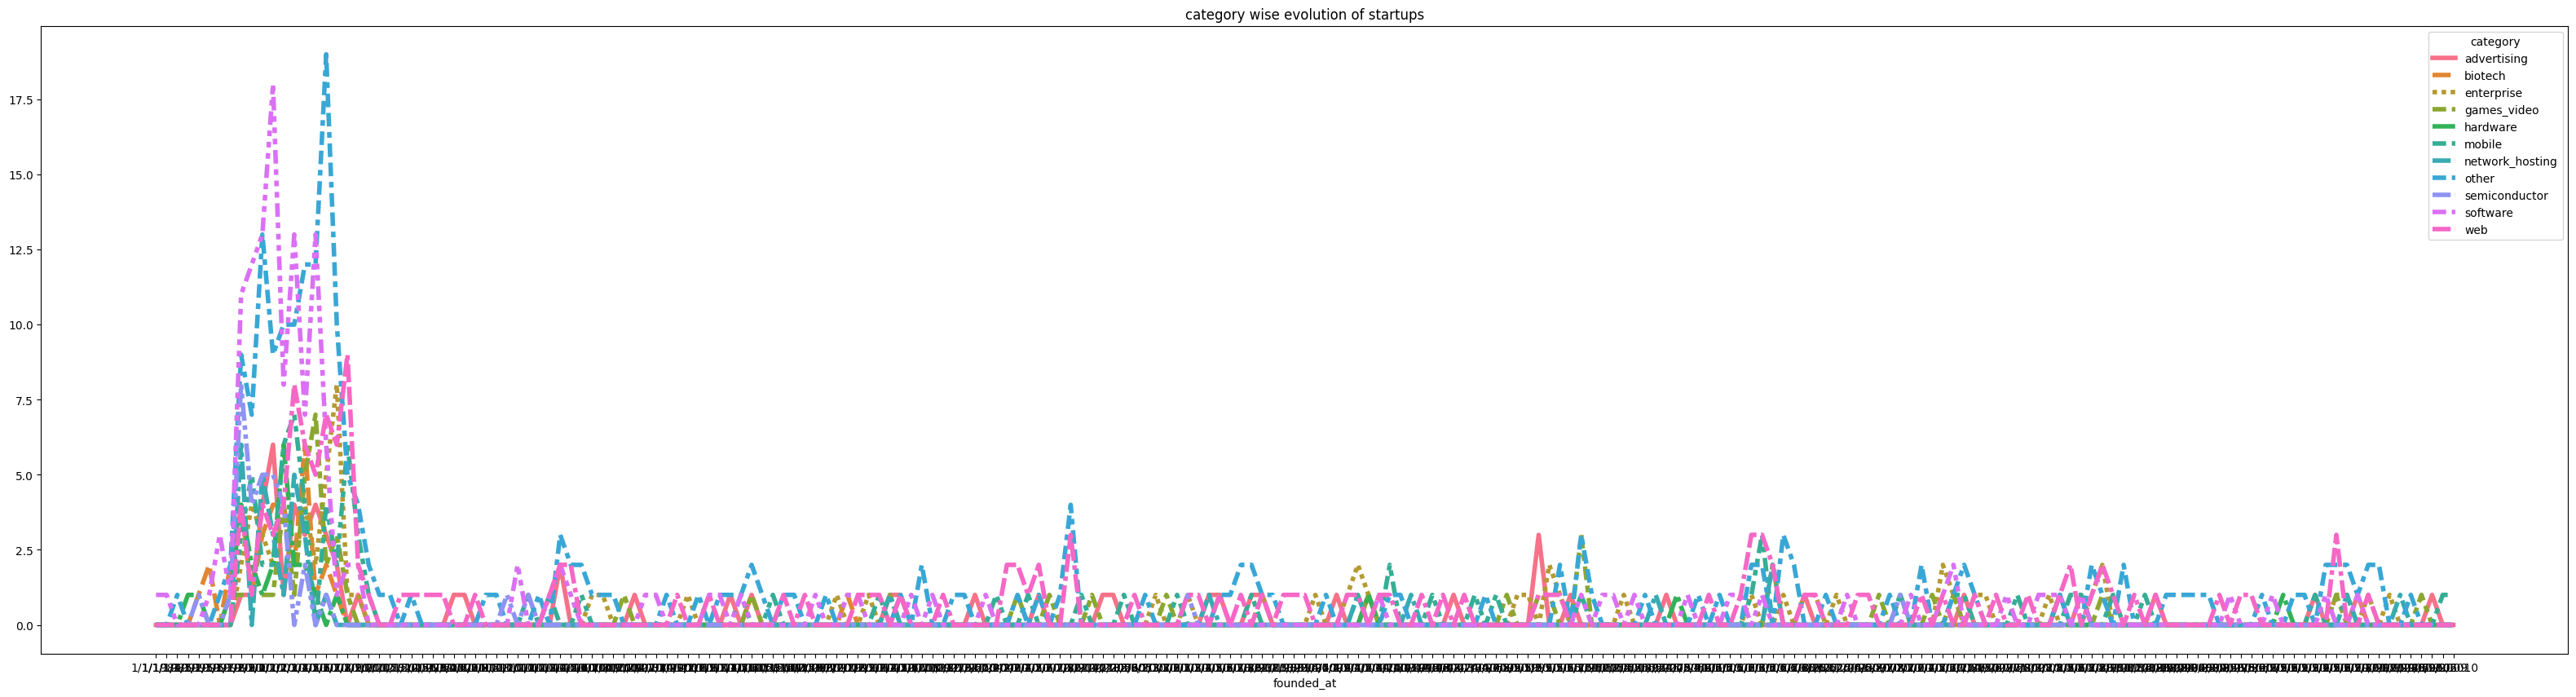

In [13]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=cat_year, lw=4, )
plt.title('category wise evolution of startups')
plt.show()

Founded- Year VS Total Funding

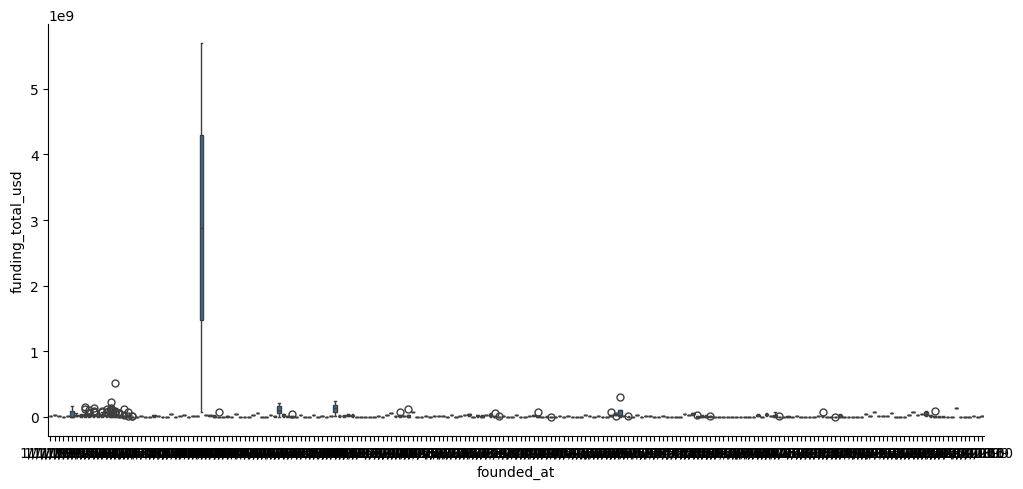

In [14]:
# Use the actual unique values in 'founded_at' for the order
order = sorted(data['founded_at'].unique())
sns.catplot(data=data, x='founded_at', y='funding_total_usd', kind='box', height=5, aspect=2, order=order)

Has_Vc, Has_angle,
Has_roundA,Has_roundB,
Has_roundC,Has_roundD

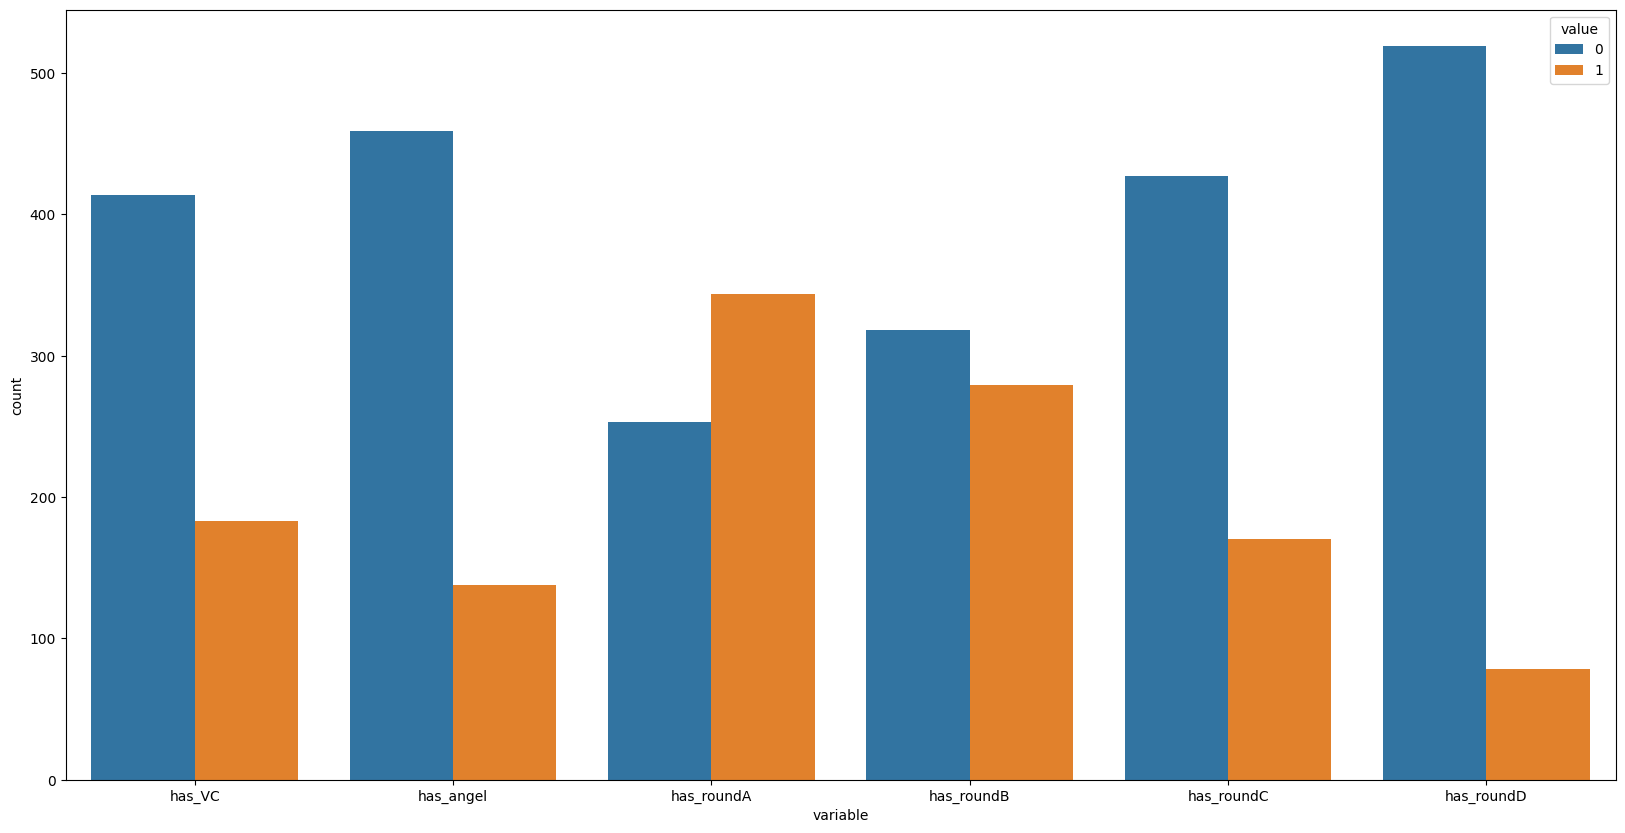

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
d = data.loc[data['status'] == 'acquired']
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]
sns.countplot(data=pd.melt(f), x='variable', hue='value', ax=ax)
plt.show()

Statistical Analysis

In [16]:
data.describe(include = ['float', 'int'])

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


Correlation Plot

<Axes: >

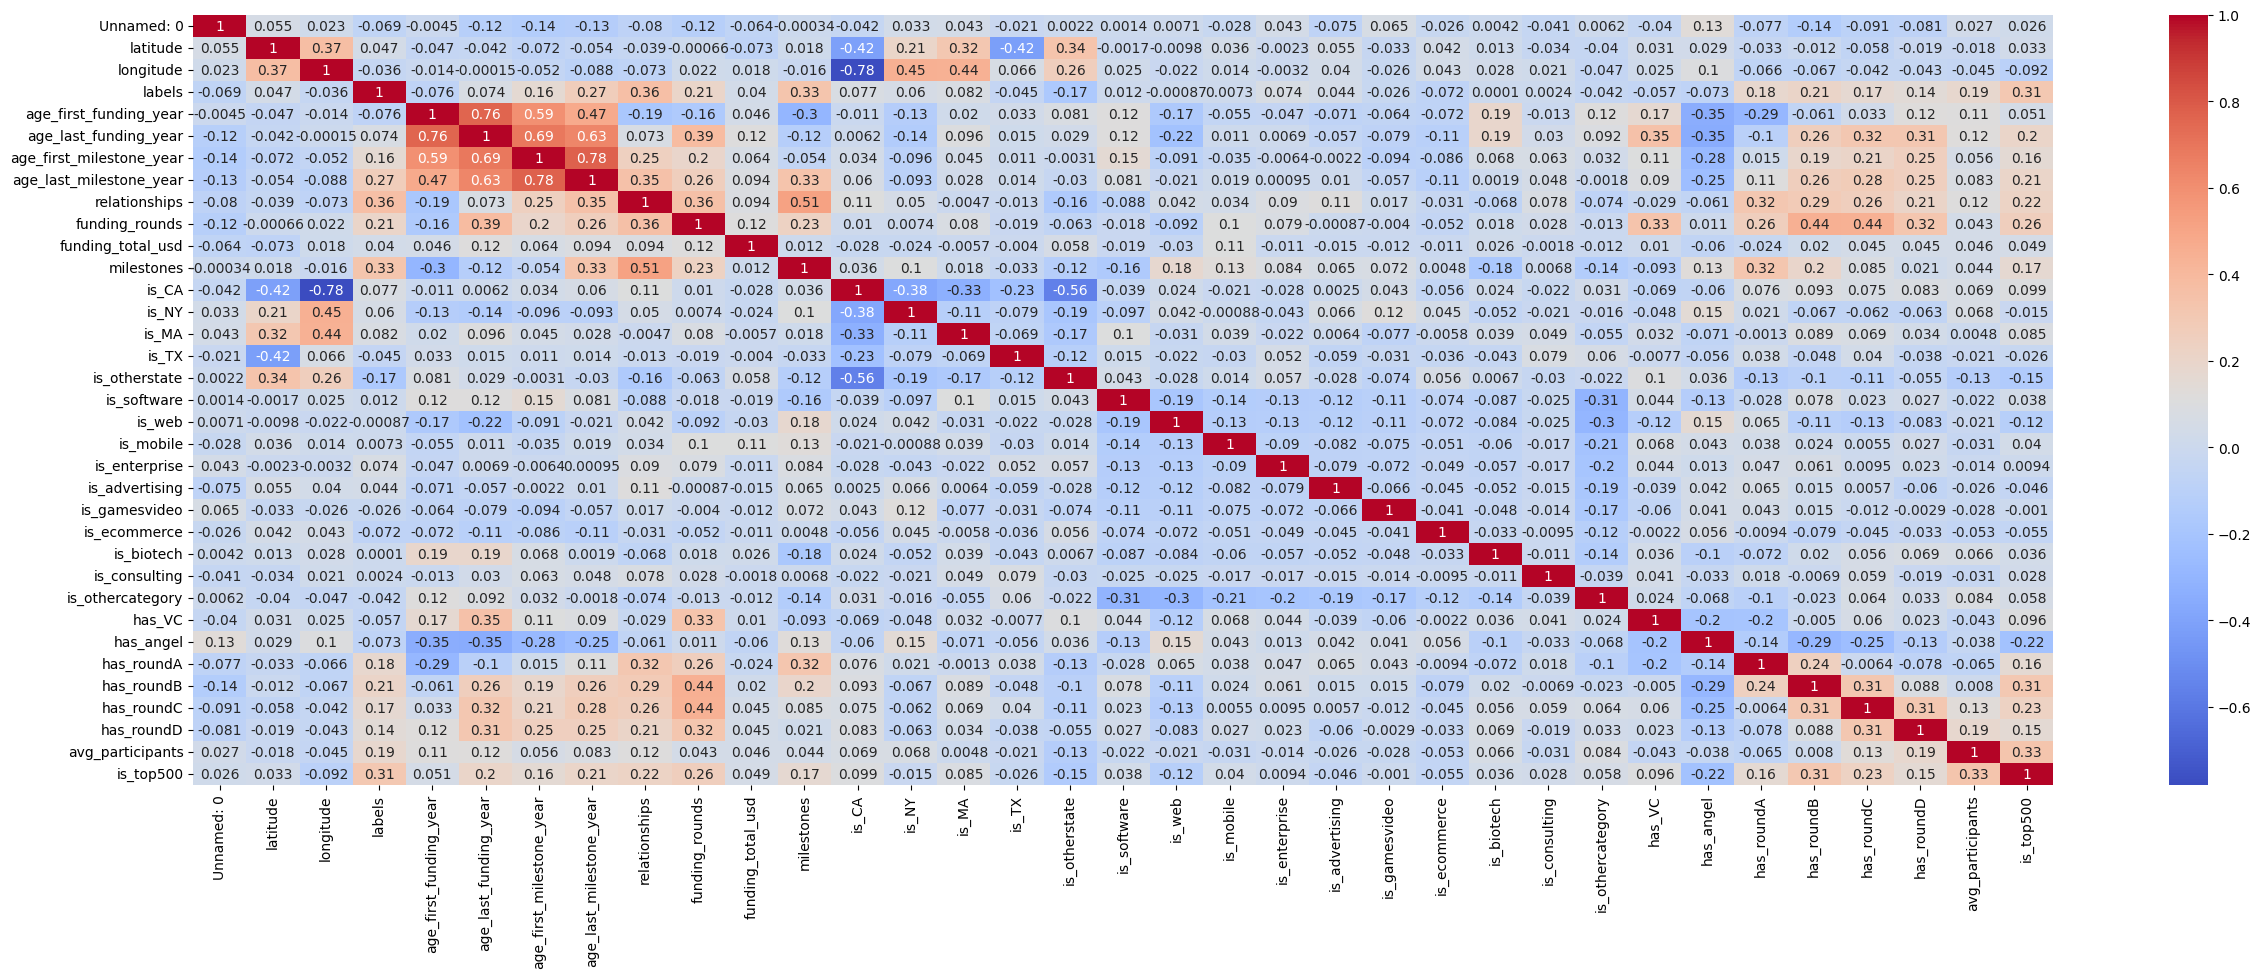

In [17]:
fig, ax = plt.subplots(figsize=(30, 10))
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr,cmap='coolwarm', annot=True,)

Pre-Processing

Reducing the Number of Categories

In [18]:
print(data['state_code'].equals(data['state_code.1']))

False


In [19]:
df = data.loc[data['state_code'] != data['state_code.1']]
df.style.set_properties(**{'background-color':'yellow'}, subset=['state_code','state_code.1'])


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,state,category
515,1110,CA,37.451124,-122.166264,94025,c:856,Menlo Park,nan,Cuil,0,1/1/2005,9/1/2010,3/1/2007,4/15/2008,2.161600,3.287700,3.498600,7.690400,13,2,33000000,4,nan,0,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,c:856,0,0,1,1,0,0,2.500000,1,closed,CA,other


In [20]:
# compute counts and proportions robustly handling missing column name
if 'state_code' in data.columns:
	state = data['state_code'].value_counts().to_frame(name='count')
elif 'state' in data.columns:
	# fallback to 'state' if 'state_code' not present
	state = data['state'].value_counts().to_frame(name='count')
else:
    raise KeyError(f"'state_code' column not found in data. Available columns: {list(data.columns)}")

state['proportion'] = state['count'] / state['count'].sum() * 100
state

,count,proportion
state_code,,
CA,488,52.871073
NY,106,11.484290
MA,83,8.992416
WA,42,4.550379
TX,42,4.550379
CO,19,2.058505
IL,18,1.950163
PA,17,1.841820
VA,13,1.408451


Dropping the Irrelevant Columns

In [21]:
data = data.drop(['category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis=1)
data.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,state,category
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,c:6669,0,1,0,0,0,0,1.0000,0,acquired,CA,other
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,CA,enterprise
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,CA,web
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,CA,software
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,CA,games_video


Train-Test Split

In [22]:


# define feature matrix `x` and target `y`
# prefer `selected_features` if it's defined in a later cell, otherwise fall back to the expected numeric feature list
x = data[['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
			  'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
			  'milestones', 'avg_participants']]

y = data['status']

# split train and test set (stratify to preserve class proportions)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Building

In [ ]:
# Specify the 9 feature columns you want to use
selected_features = [
    'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
    'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants'
]

# Select only these features for training and testing
x_train_selected = x_train[selected_features].fillna(x_train[selected_features].median())
x_test_selected = x_test[selected_features].fillna(x_train[selected_features].median())

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False)
grid_search.fit(x_train_selected, y_train)
print("Best parameters : ", grid_search.best_params_)

In [ ]:
model_rf=rf.fit(x_train_selected,y_train)
y_pred_rf=model_rf.predict(x_test_selected)
cr_rf = classification_report(y_pred_rf,y_test)
print(cr_rf)

              precision    recall  f1-score   support

    acquired       0.93      0.77      0.84       135
      closed       0.58      0.84      0.68        50

    accuracy                           0.79       185
   macro avg       0.75      0.81      0.76       185
weighted avg       0.83      0.79      0.80       185



Performance Testing

In [ ]:
mode=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred_test=model_rf.predict(x_test)
y_pred_train=model_rf.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
test_acc = accuracy_score(y_test,y_pred_test)
train_acc= accuracy_score(y_train,y_pred_train)
print('test_acc', test_acc)
print('train_acc', train_acc)

test_acc 0.8108108108108109
train_acc 1.0


Save And Load The Best Model

In [ ]:
%pip install joblib
import joblib

# save the trained model to a file
joblib.dump(model_rf,'random_forest_model.pkl')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


['random_forest_model.pkl']